In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, timedelta, datetime, timezone
import seaborn as sns
from dateutil import tz

# Chapter 1: Dates and Calendars

In [2]:
two_hurricane_dates = [date(2016, 10, 7), date(2017, 6, 21)] # arguments to date() follow "biggest to smallest" i.e year, month, date
two_hurricane_dates

[datetime.date(2016, 10, 7), datetime.date(2017, 6, 21)]

## accessing components of a date

In [3]:
first_hurricane_year = two_hurricane_dates[0].year
print(f"The year component of this date is: {first_hurricane_year}")

first_hurricane_month = two_hurricane_dates[0].month
print(f"The month component of this date is: {first_hurricane_month}")

first_hurricane_day = two_hurricane_dates[0].day
print(f"The day component of this date is: {first_hurricane_day}")

first_hurricane_weekday = two_hurricane_dates[0].weekday()
print(f"The weekday element of this date is: {first_hurricane_weekday}")
# Weekdays start on Monday with value 0

The year component of this date is: 2016
The month component of this date is: 10
The day component of this date is: 7
The weekday element of this date is: 4


In [4]:
bike_data = pd.read_csv('/Users/joseservin/DataCamp/Courses/Dates_and_Times/capital-onebike.csv')
bike_data.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member


In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Start date            290 non-null    object
 1   End date              290 non-null    object
 2   Start station number  290 non-null    int64 
 3   Start station         290 non-null    object
 4   End station number    290 non-null    int64 
 5   End station           290 non-null    object
 6   Bike number           290 non-null    object
 7   Member type           290 non-null    object
dtypes: int64(2), object(6)
memory usage: 18.2+ KB


In [6]:
bike_data['Start date'] = pd.to_datetime(bike_data['Start date'])

In [7]:
bike_data['End date'] = pd.to_datetime(bike_data['End date'])


In [8]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Start date            290 non-null    datetime64[ns]
 1   End date              290 non-null    datetime64[ns]
 2   Start station number  290 non-null    int64         
 3   Start station         290 non-null    object        
 4   End station number    290 non-null    int64         
 5   End station           290 non-null    object        
 6   Bike number           290 non-null    object        
 7   Member type           290 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 18.2+ KB


## Counting up Dates

In [9]:
# Finding Start dates that were in January
counter = 0
for dates in bike_data['Start date']:
    if dates.month == 10:
        counter += 1
print(f"The total number of rides started in October was {counter}.")

The total number of rides started in October was 108.


In [10]:
bike_data['Start month'] = pd.DatetimeIndex(bike_data['Start date']).month
bike_data

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Start month
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member,10
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual,10
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member,10
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member,10
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member,10
...,...,...,...,...,...,...,...,...,...
285,2017-12-29 14:32:55,2017-12-29 14:43:46,31242,18th St & Pennsylvania Ave NW,31265,5th St & Massachusetts Ave NW,W20529,Member,12
286,2017-12-29 15:08:26,2017-12-29 15:18:51,31265,5th St & Massachusetts Ave NW,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,W20529,Casual,12
287,2017-12-29 20:33:34,2017-12-29 20:38:13,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,31618,4th & East Capitol St NE,W20529,Member,12
288,2017-12-30 13:51:03,2017-12-30 13:54:33,31618,4th & East Capitol St NE,31610,Eastern Market / 7th & North Carolina Ave SE,W20529,Member,12


/Users/joseservin/DataCamp/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


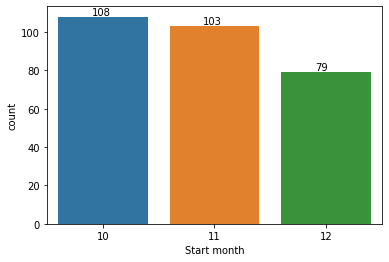

In [11]:
ax = sns.countplot(
    bike_data['Start month']
)
for p, label in zip(ax.patches, bike_data['Start month'].value_counts()):
    ax.annotate(label, (p.get_x()+0.30, p.get_height()+1))

## Dictionary map of counts

In [12]:
rides_each_month = {10:0, 11:0, 12:0}

for i in bike_data['Start month']:
    rides_each_month[i] += 1

rides_each_month

{10: 108, 11: 103, 12: 79}

## Math with Dates

In [13]:
d1 = date(2017, 11, 5)
d2 = date(2017, 12, 4)
l = [d1, d2]
min(l)

datetime.date(2017, 11, 5)

### Subtracting two dates

In [14]:
delta = d2 - d1
type(delta)

datetime.timedelta

In [15]:
# timedelta has a .days attribute that can be accessed to see number of days between dates
delta.days

29

### adding timedelta to date

In [16]:
td = timedelta(days=29)
arrived_d2 = d1 + td
arrived_d2

datetime.date(2017, 12, 4)

## Sorting dates

In [17]:
sorted_df = bike_data.sort_values('Start date', ascending=False)
sorted_df.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Start month
289,2017-12-30 15:09:03,2017-12-30 15:19:13,31610,Eastern Market / 7th & North Carolina Ave SE,31272,Washington & Independence Ave SW/HHS,W20529,Member,12
288,2017-12-30 13:51:03,2017-12-30 13:54:33,31618,4th & East Capitol St NE,31610,Eastern Market / 7th & North Carolina Ave SE,W20529,Member,12
287,2017-12-29 20:33:34,2017-12-29 20:38:13,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,31618,4th & East Capitol St NE,W20529,Member,12
286,2017-12-29 15:08:26,2017-12-29 15:18:51,31265,5th St & Massachusetts Ave NW,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,W20529,Casual,12
285,2017-12-29 14:32:55,2017-12-29 14:43:46,31242,18th St & Pennsylvania Ave NW,31265,5th St & Massachusetts Ave NW,W20529,Member,12


## Turning dates into strings

* ISO 8601 Format follows YYYY-MM-DD

In [18]:
list_of_string_dates = [d2.isoformat(), d1.isoformat()]
list_of_string_dates

['2017-12-04', '2017-11-05']

In [19]:
sorted(list_of_string_dates)

['2017-11-05', '2017-12-04']

### strftime method "string format time"

* %Y - Year
* %m - month
* %d - day

In [20]:
d1.strftime('%Y') # argument passed is called a format string

'2017'

In [21]:
from IPython.core.display_functions import display

display(two_hurricane_dates[0].strftime("The year of the first entry in hurricanes list is %Y"))
two_hurricane_dates[1].strftime("The year of the second entry in hurricanes list is %Y")

'The year of the first entry in hurricanes list is 2016'

'The year of the second entry in hurricanes list is 2017'

### getting names of months from dates with %B

In [22]:
display(two_hurricane_dates[0].strftime("The name of the month for the first entry in hurricanes list is %B"))
two_hurricane_dates[1].strftime("The name of the month for the second entry in hurricanes list is %B")

'The name of the month for the first entry in hurricanes list is October'

'The name of the month for the second entry in hurricanes list is June'

### getting day of year from dates with %j

In [23]:
display(two_hurricane_dates[0].strftime("The day of year for the first entry in hurricanes list is %j"))
two_hurricane_dates[1].strftime("The day of year for the second entry in hurricanes list is %j")

'The day of year for the first entry in hurricanes list is 281'

'The day of year for the second entry in hurricanes list is 172'

# Chapter 2: Combining Dates and Times

In [24]:
my_datetime = datetime(2017, 10, 1, 15, 23, 25)
my_datetime

datetime.datetime(2017, 10, 1, 15, 23, 25)

## Replacing parts of a datetime

In [25]:
my_datetime_hrs = my_datetime.replace(minute=0, second=0)
my_datetime_hrs

datetime.datetime(2017, 10, 1, 15, 0)

## Counting events before and after noon

In [26]:
bike_data.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Start month
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member,10
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual,10
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member,10
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member,10
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member,10


In [27]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Start date            290 non-null    datetime64[ns]
 1   End date              290 non-null    datetime64[ns]
 2   Start station number  290 non-null    int64         
 3   Start station         290 non-null    object        
 4   End station number    290 non-null    int64         
 5   End station           290 non-null    object        
 6   Bike number           290 non-null    object        
 7   Member type           290 non-null    object        
 8   Start month           290 non-null    int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 20.5+ KB


In [28]:
trip_count = {'AM':0, 'PM':0}

for i in bike_data['Start date']:
    if i.hour < 12:
        trip_count['AM'] += 1
    else:
        trip_count['PM'] += 1

trip_count

{'AM': 94, 'PM': 196}

## Printing and Parsing datetimes

In [29]:
last_ride = datetime(2017, 12, 30, 15, 19, 13)
last_ride

datetime.datetime(2017, 12, 30, 15, 19, 13)

In [30]:
last_ride.strftime('%Y-%m-%d')

'2017-12-30'

In [31]:
last_ride.strftime("%Y-%m-%d %H:%M:%S")

'2017-12-30 15:19:13'

In [32]:
last_ride.isoformat()

'2017-12-30T15:19:13'

## Parsing datetimes with strptime

In [33]:
parsed_datetime = datetime.strptime(
    '02/22/2022 13:30:14',
    '%m/%d/%Y %H:%M:%S'
)
parsed_datetime

datetime.datetime(2022, 2, 22, 13, 30, 14)

In [34]:
type(parsed_datetime)

datetime.datetime

In [35]:
print(parsed_datetime)

2022-02-22 13:30:14


## Handling Unix Timestamps

* represents the number of seconds since January 1st 1970

In [36]:
ts = 1514665153.0
ts_datetime = datetime.fromtimestamp(ts)
print(ts_datetime)

2017-12-30 14:19:13


## Working with Durations

In [37]:
start_date = datetime( 2017, 10, 8, 23, 46, 47)
end_date = datetime(2017, 10, 9, 0, 10, 57)

In [38]:
duration = end_date - start_date

In [39]:
print(duration)

0:24:10


In [40]:
print(duration.total_seconds())

1450.0


In [41]:
created_timedelta = timedelta(seconds=1)
print(start_date + created_timedelta)

2017-10-08 23:46:48


In [42]:
created_timedelta2 = timedelta(days=1, seconds=10)
print(start_date + created_timedelta2)

2017-10-09 23:46:57


## Getting duration of each trip

In [43]:
onebike_durations = []

for i in bike_data['Start date']:
    for j in bike_data['End date']:
        diff = j - i
        diff_seconds = diff.total_seconds()

        onebike_durations.append(diff_seconds)

onebike_durations

[181.0,
 8794.0,
 55168.0,
 64478.0,
 98500.0,
 100049.0,
 101300.0,
 102192.0,
 148142.0,
 183861.0,
 188923.0,
 190827.0,
 192825.0,
 229806.0,
 230309.0,
 257195.0,
 260484.0,
 263348.0,
 264214.0,
 266891.0,
 268036.0,
 319770.0,
 320780.0,
 321306.0,
 350907.0,
 356005.0,
 407676.0,
 419233.0,
 424189.0,
 427891.0,
 431161.0,
 434949.0,
 436566.0,
 437114.0,
 438338.0,
 505781.0,
 513820.0,
 515051.0,
 516086.0,
 551243.0,
 590999.0,
 596284.0,
 599668.0,
 603834.0,
 606396.0,
 608057.0,
 609113.0,
 634216.0,
 634906.0,
 636452.0,
 637995.0,
 639008.0,
 642288.0,
 643810.0,
 644775.0,
 683400.0,
 688530.0,
 690485.0,
 696133.0,
 779279.0,
 783622.0,
 787013.0,
 788146.0,
 791467.0,
 791983.0,
 793275.0,
 794909.0,
 803398.0,
 826557.0,
 832608.0,
 869869.0,
 925898.0,
 927385.0,
 944060.0,
 944692.0,
 944991.0,
 947792.0,
 1038976.0,
 1391893.0,
 1573550.0,
 1577172.0,
 1578238.0,
 1578822.0,
 1579587.0,
 1717979.0,
 1718328.0,
 1799171.0,
 1807699.0,
 1809188.0,
 1811354.0,
 1813

## Finding average trip length

In [44]:
total_time = sum(onebike_durations)
number_of_rides = len(onebike_durations)

avg_ride = total_time/number_of_rides
avg_ride

1178.9310344827586

# Chapter 3: Time Zones and Daylight Savings

## UTC offsets

In [45]:
# creating US Eastern Standard Time Zone
ET = timezone(timedelta(hours=-5)) # since Eastern US is -5 hours from UTC
dt = datetime(2017, 12, 30, 15, 9, 3, tzinfo=ET)
print(dt)

2017-12-30 15:09:03-05:00


## Converting to different timezone

In [46]:
# Creating India Standard TimeZone
IST = timezone(timedelta(hours=5, minutes=30))
print(dt.astimezone(IST))

2017-12-31 01:39:03+05:30


## Adjusting TimeZone vs Changing tzinfo

In [47]:
# tzinfo = timezome.utc has 0 UTC offset (clock stays the same but UTC offset shifts)
print(dt.replace(tzinfo=timezone.utc))

2017-12-30 15:09:03+00:00


In [48]:
# Changing original to match UTC
print(dt.astimezone(timezone.utc)) # adding 5 hours since US Eastern is -5 hours from UTC

2017-12-30 20:09:03+00:00


## Adjusting TimeZones in Bike Data to UTC-4

In [49]:
bike_data.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Start month
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member,10
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual,10
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member,10
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member,10
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member,10


In [50]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Start date            290 non-null    datetime64[ns]
 1   End date              290 non-null    datetime64[ns]
 2   Start station number  290 non-null    int64         
 3   Start station         290 non-null    object        
 4   End station number    290 non-null    int64         
 5   End station           290 non-null    object        
 6   Bike number           290 non-null    object        
 7   Member type           290 non-null    object        
 8   Start month           290 non-null    int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 20.5+ KB


In [51]:
first_time = bike_data['Start date'][0]

In [52]:
print(first_time)

2017-10-01 15:23:25


In [53]:
print(first_time.replace(tzinfo=timezone(timedelta(hours = -4))))

2017-10-01 15:23:25-04:00


In [54]:
time_changes = ['Start date','End date']
edt = timezone(timedelta(hours=-4))
for col in time_changes:
    for row in bike_data[col]:
        new_row = row.replace(tzinfo=edt)
        bike_data[col] = new_row


In [55]:
bike_data.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Start month
0,2017-12-30 15:09:03-04:00,2017-12-30 15:19:13-04:00,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member,10
1,2017-12-30 15:09:03-04:00,2017-12-30 15:19:13-04:00,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual,10
2,2017-12-30 15:09:03-04:00,2017-12-30 15:19:13-04:00,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member,10
3,2017-12-30 15:09:03-04:00,2017-12-30 15:19:13-04:00,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member,10
4,2017-12-30 15:09:03-04:00,2017-12-30 15:19:13-04:00,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member,10


## Viewing first 10 bike rides in UTC

In [56]:
for row in bike_data['Start date'][0:10]:
    utc = row.astimezone(timezone.utc)
    print(f"Original Time: {row} | UTC Time {utc}")

Original Time: 2017-12-30 15:09:03-04:00 | UTC Time 2017-12-30 19:09:03+00:00
Original Time: 2017-12-30 15:09:03-04:00 | UTC Time 2017-12-30 19:09:03+00:00
Original Time: 2017-12-30 15:09:03-04:00 | UTC Time 2017-12-30 19:09:03+00:00
Original Time: 2017-12-30 15:09:03-04:00 | UTC Time 2017-12-30 19:09:03+00:00
Original Time: 2017-12-30 15:09:03-04:00 | UTC Time 2017-12-30 19:09:03+00:00
Original Time: 2017-12-30 15:09:03-04:00 | UTC Time 2017-12-30 19:09:03+00:00
Original Time: 2017-12-30 15:09:03-04:00 | UTC Time 2017-12-30 19:09:03+00:00
Original Time: 2017-12-30 15:09:03-04:00 | UTC Time 2017-12-30 19:09:03+00:00
Original Time: 2017-12-30 15:09:03-04:00 | UTC Time 2017-12-30 19:09:03+00:00
Original Time: 2017-12-30 15:09:03-04:00 | UTC Time 2017-12-30 19:09:03+00:00


## Timezone Database

In [57]:
# Getting Eastern Timezone from dateutil
et = tz.gettz('America/New York')

In [58]:
print(last_ride.replace(tzinfo=et))

2017-12-30 15:19:13-05:00


## What time was the firt bike ride start in UK time?

In [59]:
uk = tz.gettz('Europe/London')

first_ride = bike_data['Start date'][0]

first_ride_uk  = first_ride.astimezone(uk)

print(f"The first ride locally was at  {first_ride} which is {first_ride_uk} in London")

The first ride locally was at  2017-12-30 15:09:03-04:00 which is 2017-12-30 19:09:03+00:00 in London


## What time was the first bike ride start in India time?

In [60]:
ist = tz.gettz('Asia/Kolkata')
first_ride = bike_data['Start date'][0]

first_ride_india  = first_ride.astimezone(ist)

print(f"The first ride locally was at  {first_ride} which is {first_ride_india} in India")

The first ride locally was at  2017-12-30 15:09:03-04:00 which is 2017-12-31 00:39:03+05:30 in India


## What time was the first bike ride in Pacific time?

In [61]:
sm = tz.gettz('Pacific/Apia')
first_ride = bike_data['Start date'][0]

first_ride_pacific  = first_ride.astimezone(sm)

print(f"The first ride locally was at  {first_ride} which is {first_ride_pacific} in Pacific.")

The first ride locally was at  2017-12-30 15:09:03-04:00 which is 2017-12-31 09:09:03+14:00 in Pacific.


## Starting Daylight saving time

In [62]:
spring_ahead_159am = datetime(2017, 3, 12, 1, 59, 59)
spring_ahead_159am.isoformat()

'2017-03-12T01:59:59'

In [63]:
spring_ahead_3am = datetime(2017, 3, 12, 3, 0, 0)
spring_ahead_3am.isoformat()

'2017-03-12T03:00:00'

In [64]:
(spring_ahead_3am - spring_ahead_159am).total_seconds()

3601.0

## Defining timezone timedeltas

In [65]:
EST = timezone(timedelta(hours=-5))
EDT = timezone(timedelta(hours=-4))

In [66]:
spring_ahead_159am = spring_ahead_159am.replace(tzinfo=EST)
spring_ahead_159am.isoformat()

'2017-03-12T01:59:59-05:00'

In [67]:
spring_ahead_3am = spring_ahead_3am.replace(tzinfo=EDT)
spring_ahead_3am.isoformat()

'2017-03-12T03:00:00-04:00'

In [68]:
(spring_ahead_3am - spring_ahead_159am).total_seconds()

1.0

## Using dateutil to define timezones

In [69]:
eastern = tz.gettz('America/New_York')
spring_ahead_159am = datetime( 2017, 3, 12, 1, 59, 59, tzinfo=eastern)
spring_ahead_3am = datetime(2017, 3, 12, 3, 0, 0, tzinfo=eastern)
(spring_ahead_3am - spring_ahead_159am).total_seconds()

3601.0

## Ending Daylight Saving Time

In [70]:
eastern = tz.gettz('US/Eastern')
first_1am = datetime(2017, 11, 5, 1, 0, 0, tzinfo=eastern)
tz.datetime_ambiguous(first_1am) # this let's us know if this specific time can occure at different UTC offsets

True

In [71]:
second_1am = datetime(2017, 11, 5, 1, 0, 0, tzinfo=eastern)
second_1am = tz.enfold(second_1am)

In [72]:
(first_1am - second_1am).total_seconds()

0.0

## Conclussion: turn everything into UTC

In [73]:
first_1am = first_1am.astimezone(tz.UTC)
second_1am = second_1am.astimezone(tz.UTC)
(second_1am - first_1am).total_seconds() # correctly tells us these two timestamps are 1 hour apart

3600.0

# Chapter 4: Dates and Times in Pandas

## Parsing date columns on import

In [74]:
bike_data = pd.read_csv('/Users/joseservin/DataCamp/Courses/Dates_and_Times/capital-onebike.csv', parse_dates=['Start date', 'End date'])

In [75]:
bike_data.head(3)

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member


In [76]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Start date            290 non-null    datetime64[ns]
 1   End date              290 non-null    datetime64[ns]
 2   Start station number  290 non-null    int64         
 3   Start station         290 non-null    object        
 4   End station number    290 non-null    int64         
 5   End station           290 non-null    object        
 6   Bike number           290 non-null    object        
 7   Member type           290 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 18.2+ KB


In [77]:
bike_data['Duration'] = bike_data['End date'] - bike_data['Start date']

In [78]:
bike_data['Duration'].head()

0   0 days 00:03:01
1   0 days 02:07:02
2   0 days 00:05:43
3   0 days 00:21:18
4   0 days 00:21:17
Name: Duration, dtype: timedelta64[ns]

In [79]:
bike_data['Duration'].dt.total_seconds().head()

0     181.0
1    7622.0
2     343.0
3    1278.0
4    1277.0
Name: Duration, dtype: float64

## Summarizing datetime data in Pandas

In [80]:
bike_data.tail()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Duration
285,2017-12-29 14:32:55,2017-12-29 14:43:46,31242,18th St & Pennsylvania Ave NW,31265,5th St & Massachusetts Ave NW,W20529,Member,0 days 00:10:51
286,2017-12-29 15:08:26,2017-12-29 15:18:51,31265,5th St & Massachusetts Ave NW,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,W20529,Casual,0 days 00:10:25
287,2017-12-29 20:33:34,2017-12-29 20:38:13,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,31618,4th & East Capitol St NE,W20529,Member,0 days 00:04:39
288,2017-12-30 13:51:03,2017-12-30 13:54:33,31618,4th & East Capitol St NE,31610,Eastern Market / 7th & North Carolina Ave SE,W20529,Member,0 days 00:03:30
289,2017-12-30 15:09:03,2017-12-30 15:19:13,31610,Eastern Market / 7th & North Carolina Ave SE,31272,Washington & Independence Ave SW/HHS,W20529,Member,0 days 00:10:10


In [81]:
first_ride = min(bike_data['Start date'])
first_ride

Timestamp('2017-10-01 15:23:25')

In [82]:
last_ride = max(bike_data['End date'])
last_ride

Timestamp('2017-12-30 15:19:13')

In [83]:
bike_data['Duration'].mean()

Timedelta('0 days 00:19:38.931034482')

In [84]:
bike_data['Duration'].mean().total_seconds()

1178.931034

In [85]:
bike_data['Duration'].sum()

Timedelta('3 days 22:58:10')

In [86]:
(max(bike_data['End date']) - (min(bike_data['Start date'])) )

Timedelta('89 days 23:55:48')

In [87]:
# Percent of time out of dock
bike_data['Duration'].sum() / timedelta(days=91)

0.04348417785917786

## Summarizing non-numeric columns

In [88]:
bike_data['Member type'].value_counts()

Member    236
Casual     54
Name: Member type, dtype: int64

In [89]:
print(len(bike_data))

290


In [90]:
# percent of rides between members and casual
bike_data['Member type'].value_counts() / len(bike_data) # the part divided by whole (total number of rides)

Member    0.813793
Casual    0.186207
Name: Member type, dtype: float64

## examining Duration column

In [91]:
bike_data['Duration seconds'] = bike_data['Duration'].dt.total_seconds()

In [92]:
bike_data.groupby('Member type')['Duration seconds'].mean()

Member type
Casual    1994.666667
Member     992.279661
Name: Duration seconds, dtype: float64

In [93]:
bike_data.groupby('Member type').first()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Duration,Duration seconds
Member type,,,,,,,,,
Casual,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,0 days 02:07:02,7622.0
Member,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,0 days 00:03:01,181.0


## Average ride duration using resample

In [94]:
bike_data.resample('M', on ='Start date')['Duration seconds'].mean()

Start date
2017-10-31    1886.453704
2017-11-30     854.174757
2017-12-31     635.101266
Freq: M, Name: Duration seconds, dtype: float64

In [95]:
bike_data['Member type'].value_counts()

Member    236
Casual     54
Name: Member type, dtype: int64

In [96]:
bike_data.groupby('Member type').size()

Member type
Casual     54
Member    236
dtype: int64

<AxesSubplot:xlabel='Start date'>

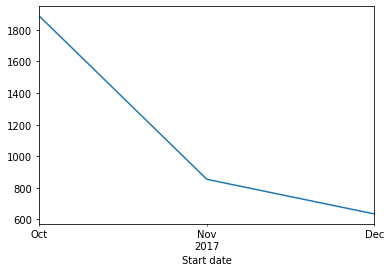

In [97]:
bike_data.resample('M', on ='Start date')['Duration seconds'].mean().plot()

In [98]:
bike_data

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Duration,Duration seconds
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member,0 days 00:03:01,181.0
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual,0 days 02:07:02,7622.0
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member,0 days 00:05:43,343.0
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member,0 days 00:21:18,1278.0
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member,0 days 00:21:17,1277.0
...,...,...,...,...,...,...,...,...,...,...
285,2017-12-29 14:32:55,2017-12-29 14:43:46,31242,18th St & Pennsylvania Ave NW,31265,5th St & Massachusetts Ave NW,W20529,Member,0 days 00:10:51,651.0
286,2017-12-29 15:08:26,2017-12-29 15:18:51,31265,5th St & Massachusetts Ave NW,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,W20529,Casual,0 days 00:10:25,625.0
287,2017-12-29 20:33:34,2017-12-29 20:38:13,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,31618,4th & East Capitol St NE,W20529,Member,0 days 00:04:39,279.0
288,2017-12-30 13:51:03,2017-12-30 13:54:33,31618,4th & East Capitol St NE,31610,Eastern Market / 7th & North Carolina Ave SE,W20529,Member,0 days 00:03:30,210.0


In [99]:
max_seconds = bike_data['Duration seconds'].max()
max_data = bike_data.query("`Duration seconds` == @max_seconds")
max_data

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Duration,Duration seconds
86,2017-10-21 13:47:43,2017-10-22 11:09:36,31616,3rd & H St NE,31607,14th & D St SE,W20529,Member,0 days 21:21:53,76913.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9abfebfd60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9abfed4220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9abfebfa90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9abfed47c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9abfed4a90>],
 'means': []}

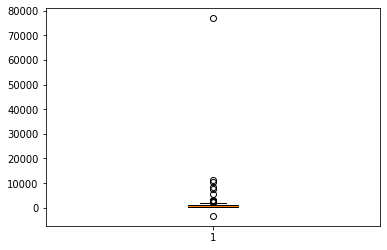

In [100]:
plt.boxplot(bike_data['Duration seconds'])

In [101]:
#bike_data = bike_data.drop(bike_data.index[86])

In [102]:
#plt.boxplot(bike_data['Duration seconds'])

In [103]:
monthly_rides = bike_data.resample('M', on = 'Start date')['Member type']
monthly_rides.value_counts() / len(monthly_rides)

Start date  Member type
2017-10-31  Member         27.666667
            Casual          8.333333
2017-11-30  Member         28.333333
            Casual          6.000000
2017-12-31  Member         22.666667
            Casual          3.666667
Name: Member type, dtype: float64

In [104]:
grouped = bike_data.groupby('Member type')\
  .resample('M', on='Start date')

In [105]:
grouped['Duration'].mean() / 60

Member type  Start date
Casual       2017-10-31   0 days 00:00:41.825333333
             2017-11-30   0 days 00:00:29.491666666
             2017-12-31   0 days 00:00:19.883333333
Member       2017-10-31   0 days 00:00:28.313052208
             2017-11-30   0 days 00:00:11.005686274
             2017-12-31   0 days 00:00:09.080882352
Name: Duration, dtype: timedelta64[ns]

## Additional datetime methods in Pandas

In [106]:
bike_data['Duration'].dt.total_seconds().min()

-3346.0

## localize datetimes to timezones

In [107]:
bike_data['Start date'].head(3).dt.tz_localize('America/New_York')

0   2017-10-01 15:23:25-04:00
1   2017-10-01 15:42:57-04:00
2   2017-10-02 06:37:10-04:00
Name: Start date, dtype: datetime64[ns, America/New_York]

## localize datetime timezones to column

In [108]:
bike_data['Start date'] = bike_data['Start date'].dt.tz_localize('America/New_York', ambiguous='NaT')
bike_data['End date'] = bike_data['End date'].dt.tz_localize('America/New_York', ambiguous='NaT')

In [109]:
# re-calculate duration with timezones
bike_data['Duration'] = bike_data['End date'] - bike_data['Start date']

In [110]:
bike_data['Duration'].dt.total_seconds().min()

116.00000000000001

In [111]:
# Looking at problematic row
bike_data.iloc[129]

Start date                        NaT
End date                          NaT
Start station number            31615
Start station           6th & H St NE
End station number              31627
End station             3rd & M St NE
Bike number                    W20529
Member type                    Member
Duration                          NaT
Duration seconds              -3346.0
Name: 129, dtype: object

In [112]:
bike_data['Start date'].head(3).dt.year

0    2017
1    2017
2    2017
Name: Start date, dtype: int64

In [113]:
bike_data['Start date'].head(3)

0   2017-10-01 15:23:25-04:00
1   2017-10-01 15:42:57-04:00
2   2017-10-02 06:37:10-04:00
Name: Start date, dtype: datetime64[ns, America/New_York]

## Shifting the indexes forward one, padding with NaT to compare current row with previous one

In [114]:
bike_data.head(3)[['Start date','End date']]

,Start date,End date
0,2017-10-01 15:23:25-04:00,2017-10-01 15:26:26-04:00
1,2017-10-01 15:42:57-04:00,2017-10-01 17:49:59-04:00
2,2017-10-02 06:37:10-04:00,2017-10-02 06:42:53-04:00


In [115]:
bike_data['End date'].shift(1).head(3)

0                         NaT
1   2017-10-01 15:26:26-04:00
2   2017-10-01 17:49:59-04:00
Name: End date, dtype: datetime64[ns, America/New_York]